In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [4]:
df = df.drop_duplicates()
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [5]:
df.rename(columns = {"ExperienceInCurrentDomain":"Experience_year"}, inplace = True)
df

/tmp/ipykernel_393/3512843906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"ExperienceInCurrentDomain":"Experience_year"}, inplace = True)


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,Experience_year,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [6]:
df2 = pd.get_dummies(df, columns = ["LeaveOrNot"], drop_first = True)
df2.rename(columns = {"LeaveOrNot_1":"Leave"}, inplace = True)
df2

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,Experience_year,Leave
0,Bachelors,2017,Bangalore,3,34,Male,No,0,False
1,Bachelors,2013,Pune,1,28,Female,No,3,True
2,Bachelors,2014,New Delhi,3,38,Female,No,2,False
3,Masters,2016,Bangalore,3,27,Male,No,5,True
4,Masters,2017,Pune,3,24,Male,Yes,2,True
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,False
4647,Bachelors,2016,Pune,3,30,Male,No,2,False
4649,Masters,2013,Pune,2,37,Male,No,2,True
4650,Masters,2018,New Delhi,3,27,Male,No,5,True


Text(0.5, 1.0, 'Employee distribution based on college degree obtained')

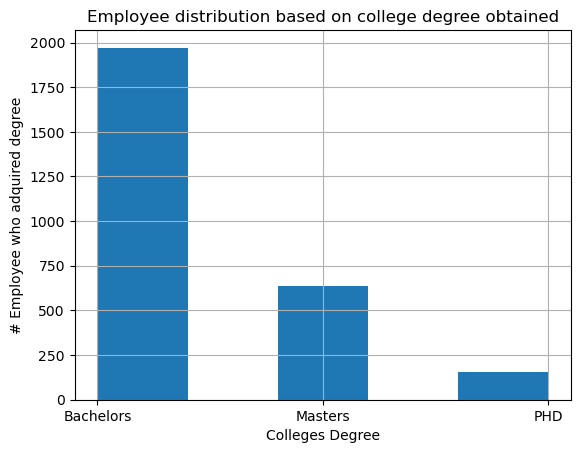

In [7]:
#sns.scatterplot(x = "Experience_year", y = "PaymentTier", hue = "Education", data = df2)
#sns.relplot(x = "Experience_year", y = "PaymentTier", kind = "line",data = df2)
df2["Education"].hist(bins = 5)
plt.xlabel("Colleges Degree")
plt.ylabel("# Employee who adquired degree")
plt.title("Employee distribution based on college degree obtained")

Text(0.5, 1.0, 'Employees based on experience on field')

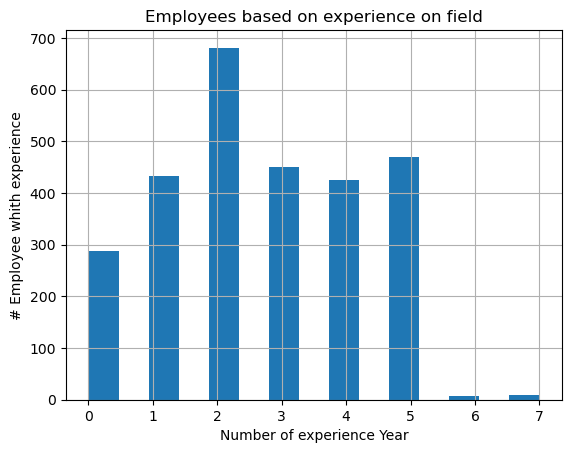

In [8]:
df2["Experience_year"].hist(bins = 15)
plt.xlabel("Number of experience Year")
plt.ylabel("# Employee whith experience")
plt.title("Employees based on experience on field")

Text(0.5, 1.0, 'Proportion of employees divided byu cities')

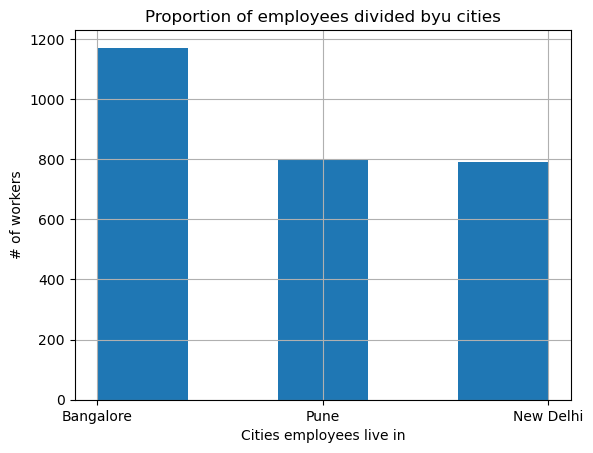

In [9]:
df2["City"].hist(bins = 5)
plt.xlabel("Cities employees live in")
plt.ylabel("# of workers")
plt.title("Proportion of employees divided byu cities")

Text(0.5, 1.0, 'Distribution of employees based on gender')

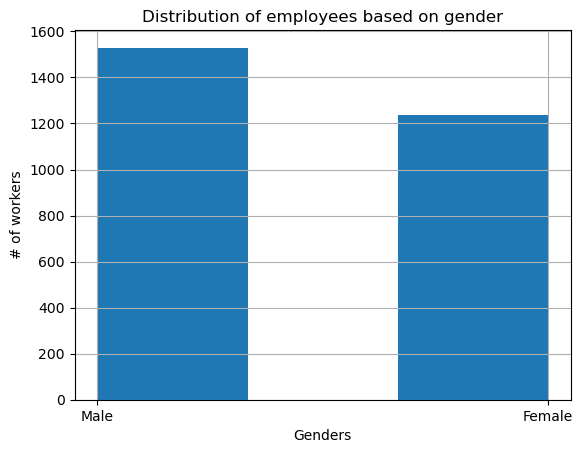

In [10]:
df2["Gender"].hist(bins = 3)
plt.xlabel("Genders")
plt.ylabel("# of workers")
plt.title("Distribution of employees based on gender")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Education Achieve vs Payment Tier at company')

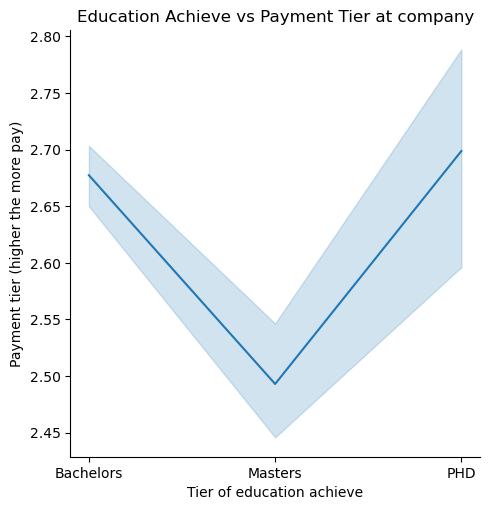

In [11]:
sns.relplot(x = "Education", y = "PaymentTier", kind = "line",data = df2)
plt.xlabel("Tier of education achieve")
plt.ylabel("Payment tier (higher the more pay)")
plt.title("Education Achieve vs Payment Tier at company")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Education Achieve vs Experience Year in the industry')

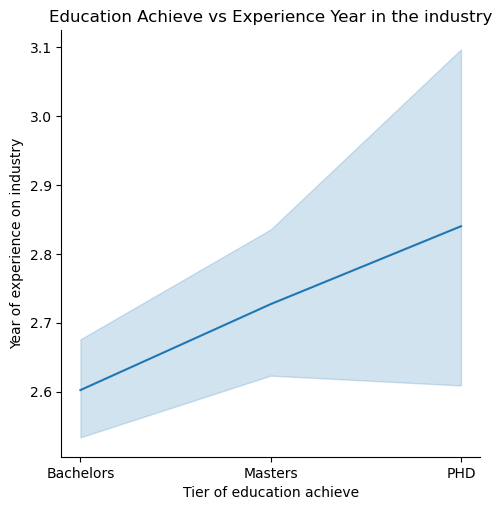

In [12]:
sns.relplot(x = "Education", y = "Experience_year", kind = "line",data = df2)
plt.xlabel("Tier of education achieve")
plt.ylabel("Year of experience on industry")
plt.title("Education Achieve vs Experience Year in the industry")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Education Achieve vs Experience Year in the industry')

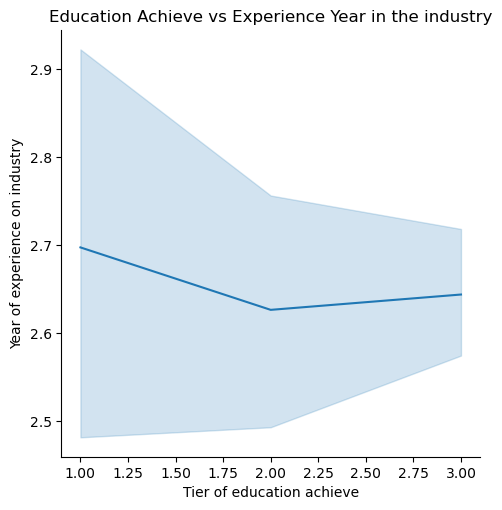

In [13]:
sns.relplot(x = "PaymentTier", y = "Experience_year", kind = "line",data = df2)
plt.xlabel("Tier of education achieve")
plt.ylabel("Year of experience on industry")
plt.title("Education Achieve vs Experience Year in the industry")

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import graphviz
 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [15]:
df_new = pd.get_dummies(df, columns = ["Education", "City", "Gender"], drop_first = True)
df_new = df_new.drop(columns = "EverBenched", axis = 1)
df_new

,JoiningYear,PaymentTier,Age,Experience_year,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male
0,2017,3,34,0,0,False,False,False,False,True
1,2013,1,28,3,1,False,False,False,True,False
2,2014,3,38,2,0,False,False,True,False,False
3,2016,3,27,5,1,True,False,False,False,True
4,2017,3,24,2,1,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
4645,2017,2,31,2,0,True,False,False,True,False
4647,2016,3,30,2,0,False,False,False,True,True
4649,2013,2,37,2,1,True,False,False,True,True
4650,2018,3,27,5,1,True,False,True,False,True


In [16]:
y = df_new["PaymentTier"]
x = df_new.drop(columns = "PaymentTier", axis = 1)

0.403257134678615

0.33019518933455455

[Text(0.5, 0.875, 'x[7] <= 0.5\nsquared_error = 0.381\nsamples = 2211\nvalue = 2.642'),
 Text(0.25, 0.625, 'x[6] <= 0.5\nsquared_error = 0.346\nsamples = 1576\nvalue = 2.718'),
 Text(0.125, 0.375, 'x[1] <= 30.5\nsquared_error = 0.302\nsamples = 947\nvalue = 2.803'),
 Text(0.0625, 0.125, 'squared_error = 0.385\nsamples = 464\nvalue = 2.733'),
 Text(0.1875, 0.125, 'squared_error = 0.213\nsamples = 483\nvalue = 2.87'),
 Text(0.375, 0.375, 'x[0] <= 2016.5\nsquared_error = 0.385\nsamples = 629\nvalue = 2.591'),
 Text(0.3125, 0.125, 'squared_error = 0.343\nsamples = 362\nvalue = 2.738'),
 Text(0.4375, 0.125, 'squared_error = 0.373\nsamples = 267\nvalue = 2.393'),
 Text(0.75, 0.625, 'x[8] <= 0.5\nsquared_error = 0.418\nsamples = 635\nvalue = 2.454'),
 Text(0.625, 0.375, 'x[0] <= 2016.5\nsquared_error = 0.397\nsamples = 299\nvalue = 2.204'),
 Text(0.5625, 0.125, 'squared_error = 0.439\nsamples = 227\nvalue = 2.154'),
 Text(0.6875, 0.125, 'squared_error = 0.231\nsamples = 72\nvalue = 2.361'),
 

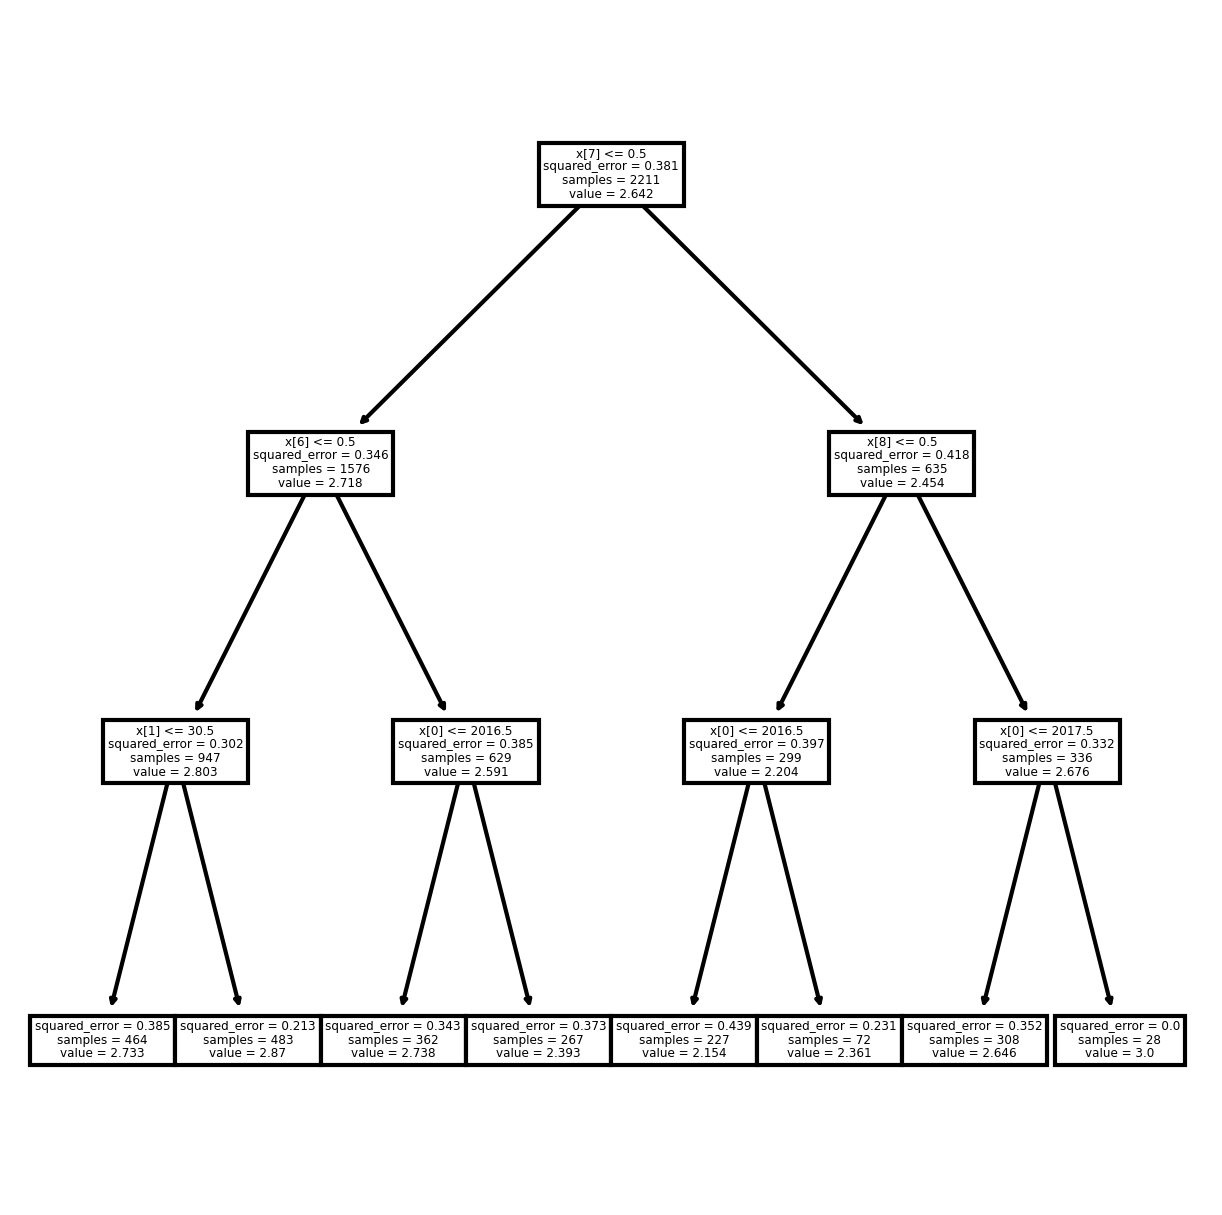

In [17]:
from sklearn.tree import plot_tree
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model_train = DecisionTreeRegressor(max_depth = 3)
mode_train =model_train.fit(x_train, y_train)
y_pred = model_train.predict(x_test)
display(mean_squared_error(y_test,y_pred))
y_new_pred = model_train.predict(x_train)
display(mean_squared_error(y_train, y_new_pred))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(model_train)

In [18]:
dot_data = export_graphviz(model_train, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("df.dot")
with open ("df.dot", "r") as fin:
    with open("insurance_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","JoiningYear")
            line = line.replace("X[1]","PaymentTier")
            line = line.replace("X[2]","Age")
            line = line.replace("X[3]","Experience_year")
            line = line.replace("X[4]","LeaveOrNot")
            line = line.replace("X[5]","Education_master")            
            line = line.replace("X[6]","Education_PHD")
            line = line.replace("X[7]","City_New Delhi")
            line = line.replace("X[8]","City_Pune")
            line = line.replace("X[9]","Gender_Male")
            fout.write(line)

0.32071826238063184

0.3107883829627138

[Text(0.5145833333333333, 0.9166666666666666, 'x[7] <= 0.5\nsquared_error = 0.388\nsamples = 2211\nvalue = 2.638'),
 Text(0.26666666666666666, 0.75, 'x[4] <= 0.5\nsquared_error = 0.363\nsamples = 1590\nvalue = 2.708'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[1] <= 28.5\nsquared_error = 0.346\nsamples = 1213\nvalue = 2.753'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[2] <= 1.5\nsquared_error = 0.43\nsamples = 479\nvalue = 2.683'),
 Text(0.03333333333333333, 0.25, 'x[8] <= 0.5\nsquared_error = 0.231\nsamples = 108\nvalue = 2.833'),
 Text(0.016666666666666666, 0.08333333333333333, 'squared_error = 0.356\nsamples = 51\nvalue = 2.725'),
 Text(0.05, 0.08333333333333333, 'squared_error = 0.1\nsamples = 57\nvalue = 2.93'),
 Text(0.1, 0.25, 'x[0] <= 2017.5\nsquared_error = 0.479\nsamples = 371\nvalue = 2.639'),
 Text(0.08333333333333333, 0.08333333333333333, 'squared_error = 0.501\nsamples = 333\nvalue = 2.616'),
 Text(0.11666666666666667, 0.08333333333333333, 'squared_error =

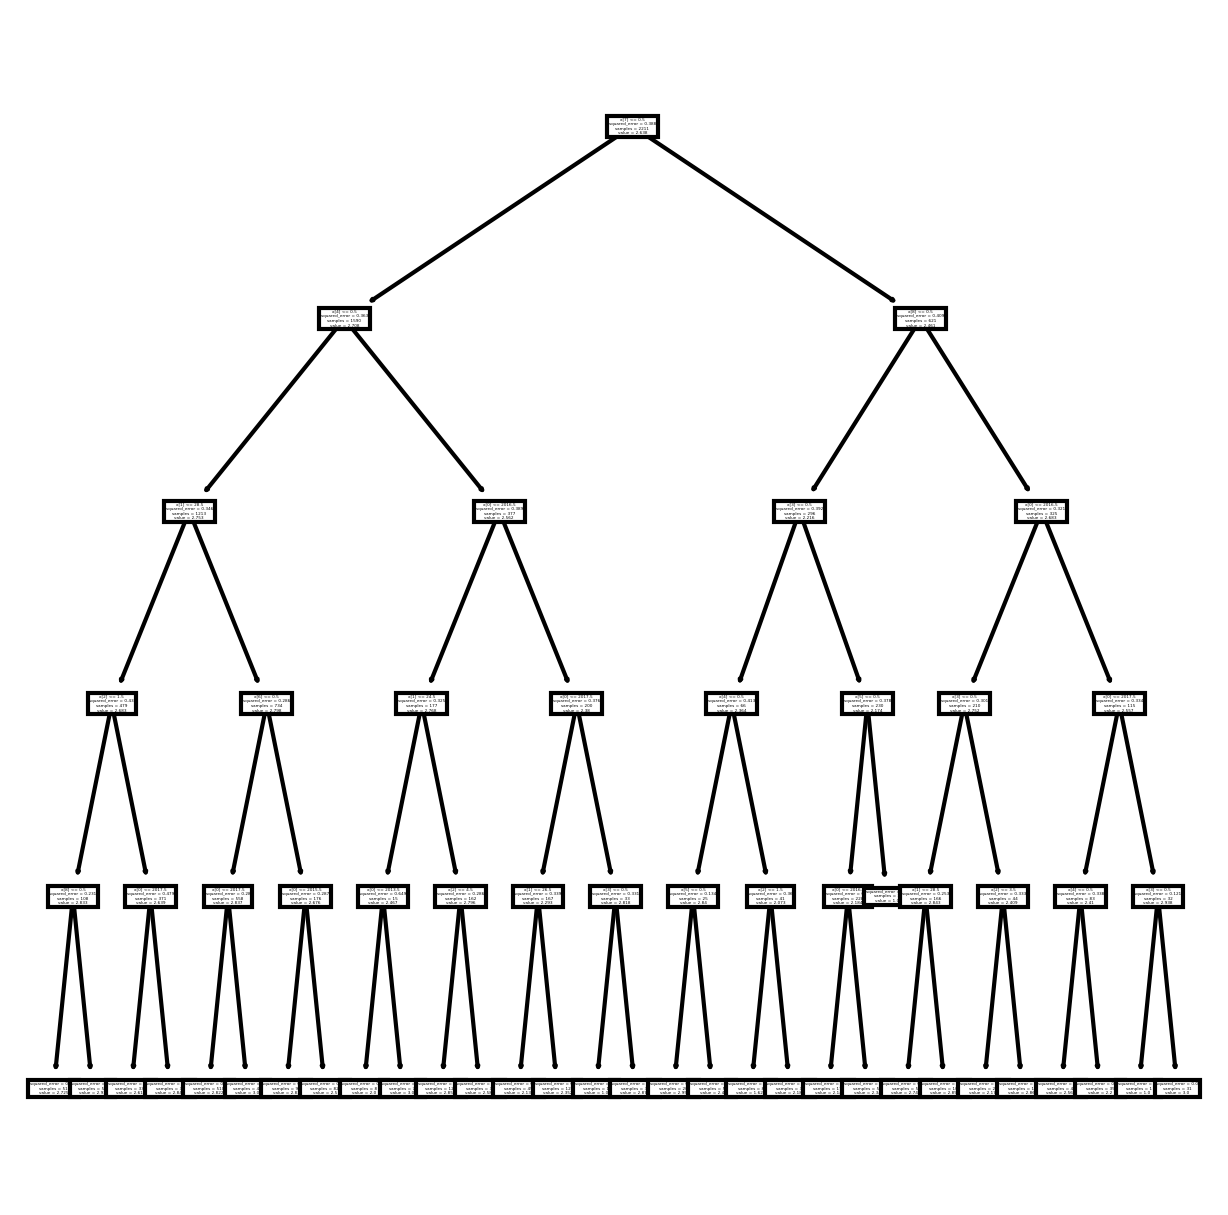

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model_train = DecisionTreeRegressor(max_depth = 5)
mode_train =model_train.fit(x_train, y_train)
y_pred = model_train.predict(x_test)
display(mean_squared_error(y_test,y_pred))
y_new_pred = model_train.predict(x_train)
display(mean_squared_error(y_train, y_new_pred))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(model_train)

0.3575903962871975

0.3532994733376421

[Text(0.5, 0.8333333333333334, 'x[8] <= 0.5\nsquared_error = 0.387\nsamples = 2211\nvalue = 2.641'),
 Text(0.25, 0.5, 'x[7] <= 0.5\nsquared_error = 0.435\nsamples = 982\nvalue = 2.519'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.401\nsamples = 683\nvalue = 2.647'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.39\nsamples = 299\nvalue = 2.227'),
 Text(0.75, 0.5, 'x[4] <= 0.5\nsquared_error = 0.327\nsamples = 1229\nvalue = 2.738'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.291\nsamples = 940\nvalue = 2.79'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.405\nsamples = 289\nvalue = 2.567')]

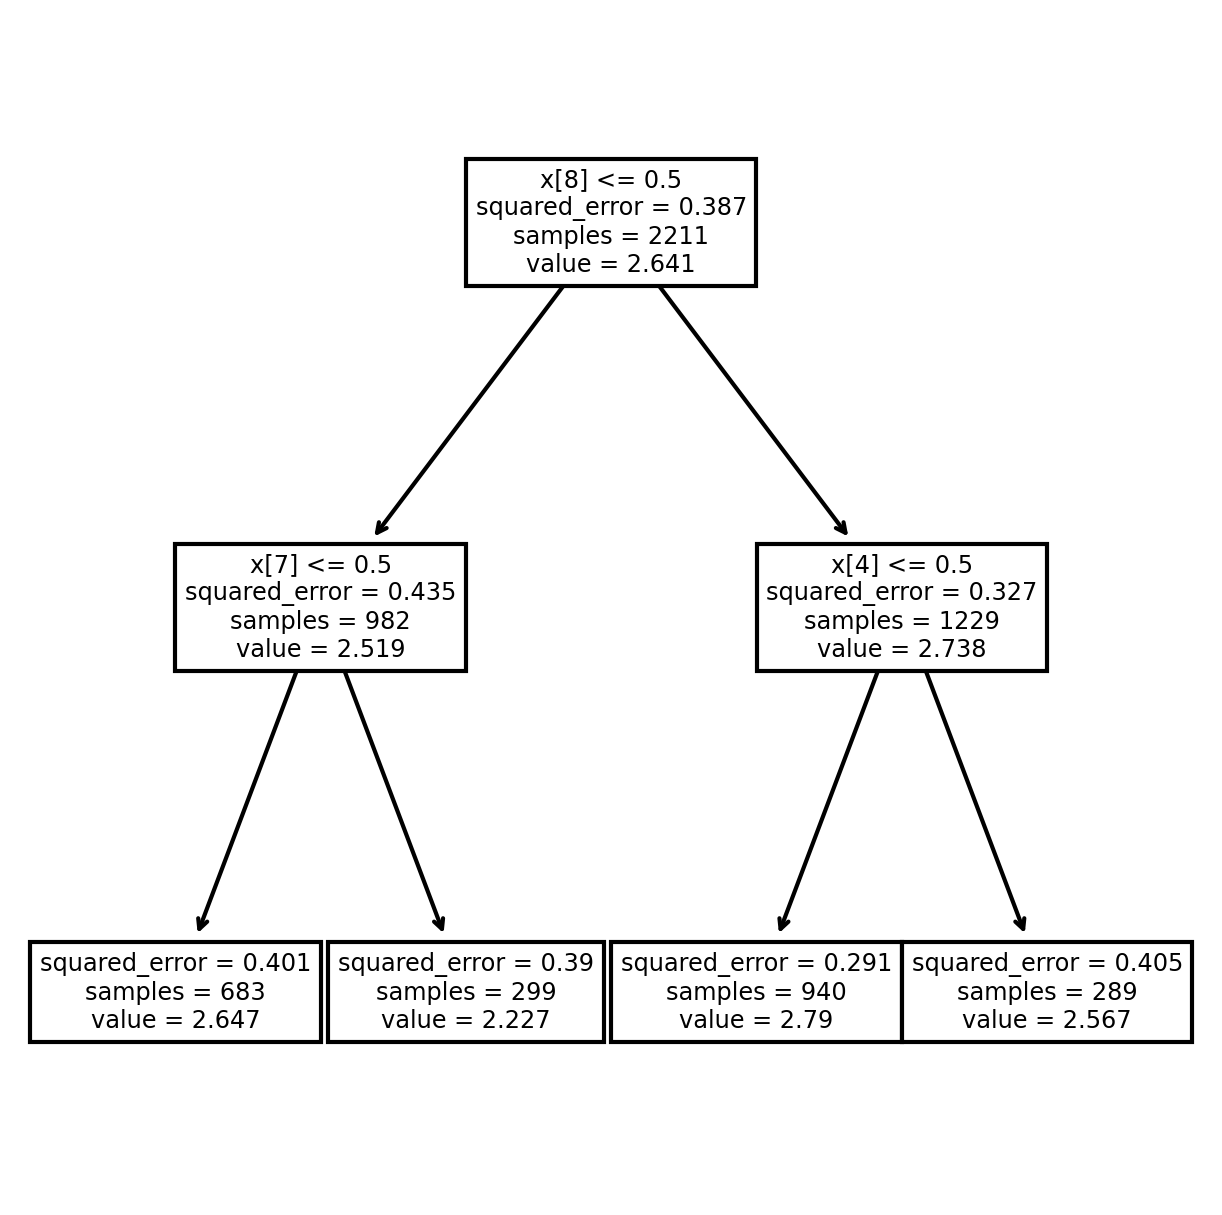

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model_train = DecisionTreeRegressor(max_depth = 2)
mode_train =model_train.fit(x_train, y_train)
y_pred = model_train.predict(x_test)
display(mean_squared_error(y_test,y_pred))
y_new_pred = model_train.predict(x_train)
display(mean_squared_error(y_train, y_new_pred))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(model_train)

In [21]:
dot_data = export_graphviz(model_train, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("df.dot")
with open ("df.dot", "r") as fin:
    with open("insurance_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","JoiningYear")
            line = line.replace("X[1]","PaymentTier")
            line = line.replace("X[2]","Age")
            line = line.replace("X[3]","Experience_year")
            line = line.replace("X[4]","LeaveOrNot")
            line = line.replace("X[5]","Education_master")            
            line = line.replace("X[6]","Education_PHD")
            line = line.replace("X[7]","City_New Delhi")
            line = line.replace("X[8]","City_Pune")
            line = line.replace("X[9]","Gender_Male")
            fout.write(line)

In [22]:
#K-NEAREST NEIGHBORS

SyntaxError: invalid syntax (3796888357.py, line 1)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
x = df_new.drop(columns = ["PaymentTier"])
y = df_new["PaymentTier"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train, y_train)
y_new_pred = knn.predict(x_train)
display(mean_squared_error(y_train, y_new_pred))
knn.fit(x_test,y_test)
y_test_pred = knn.predict(x_test)
display(mean_squared_error(y_test_pred,y_test))

0.2819760197158918

0.3520684946673064

In [31]:

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)
y_new_pred = knn.predict(x_train)
display(mean_squared_error(y_train, y_new_pred))
knn.fit(x_test,y_test)
y_test_pred = knn.predict(x_test)
display(mean_squared_error(y_test_pred,y_test))

0.2664676616915423

0.33005424954792045

In [33]:
knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(x_train, y_train)
y_new_pred = knn.predict(x_train)
display(mean_squared_error(y_train, y_new_pred))
knn.fit(x_test,y_test)
y_test_pred = knn.predict(x_test)
display(mean_squared_error(y_test_pred,y_test))


0.3154711292024725

0.37506128189672494

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


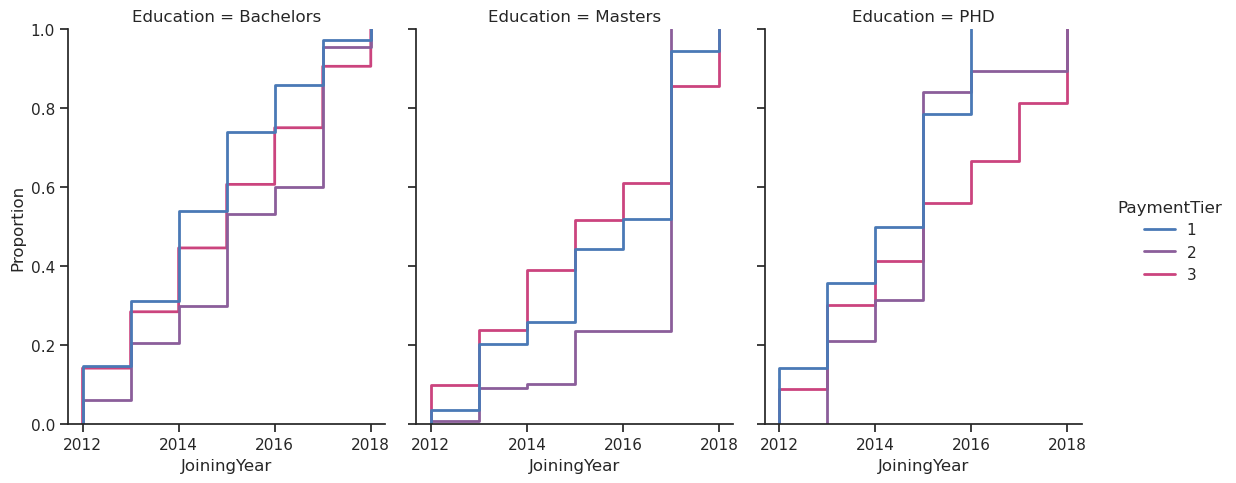

In [38]:
import seaborn as sns
sns.set_theme(style="ticks")
mpg = sns.load_dataset("mpg")

colors = (250, 70, 50), (350, 70, 50)
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)
sns.displot(
    df2,
    x="JoiningYear", col="Education", hue="PaymentTier",
    kind="ecdf", aspect=.75, linewidth=2, palette=cmap,
)

In [49]:
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

In [73]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
clusters = kmeans.predict(x)
clusters
df["clusters"] = clusters
df

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_393/4239129236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clusters"] = clusters


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,Experience_year,LeaveOrNot,clusters
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,2
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1,1
...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0,2
4647,Bachelors,2016,Pune,3,30,Male,No,2,0,2
4649,Masters,2013,Pune,2,37,Male,No,2,1,0
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,1


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


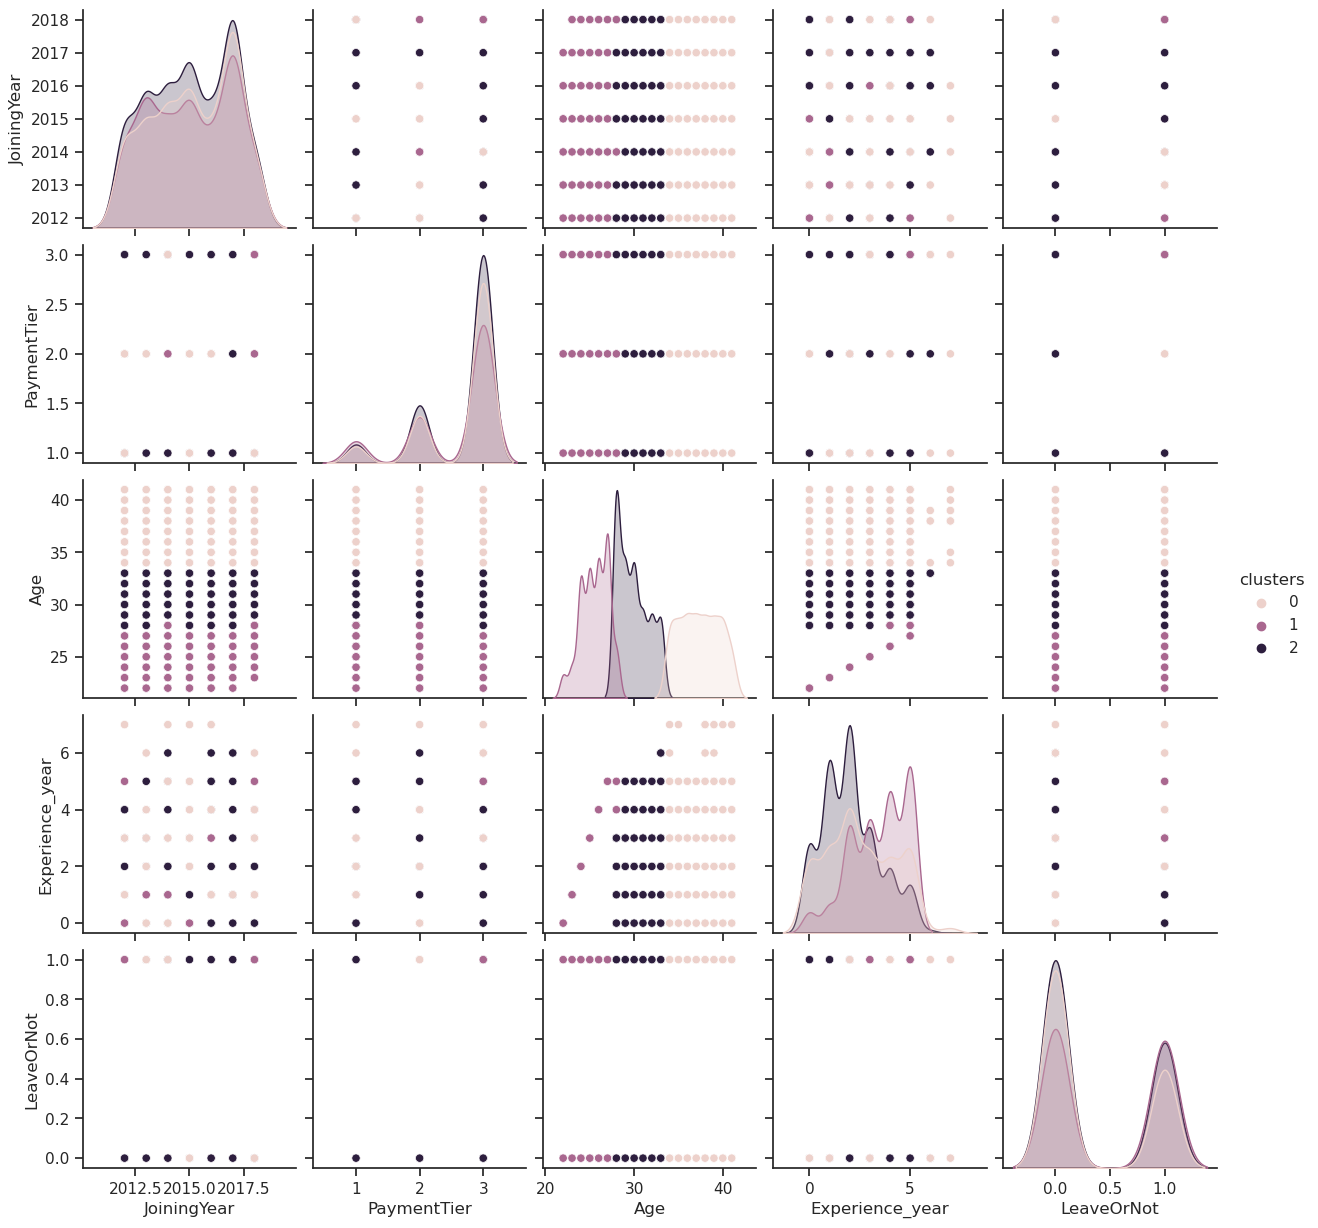

In [75]:
sns.pairplot(data = df,hue="clusters")

In [77]:
cluster_map = {"0":"Tier1", "1":"Tier2", "2":"Tier3"}
df["mapped_clusters"] = df["clusters"].apply(str).map(cluster_map)
df

/tmp/ipykernel_393/818176390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mapped_clusters"] = df["clusters"].apply(str).map(cluster_map)


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,Experience_year,LeaveOrNot,clusters,mapped_clusters
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,0,Tier1
1,Bachelors,2013,Pune,1,28,Female,No,3,1,2,Tier3
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,0,Tier1
3,Masters,2016,Bangalore,3,27,Male,No,5,1,1,Tier2
4,Masters,2017,Pune,3,24,Male,Yes,2,1,1,Tier2
...,...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0,2,Tier3
4647,Bachelors,2016,Pune,3,30,Male,No,2,0,2,Tier3
4649,Masters,2013,Pune,2,37,Male,No,2,1,0,Tier1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,1,Tier2
